In [97]:
install.packages("DataExplorer")
install.packages("psych")
install.packages("cluster")
install.packages("factoextra")
install.packages("moments")
library(ggplot2)
library(dplyr)
library(DataExplorer)
library(psych)
library(factoextra)
library(cluster)
library(moments)
library(knitr)

options(warn=-1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#High Level Overview of Assignment

- Cluster Analysis of Housing Data

###We Own a real estate firm and want to identiy types of houses 
- Knowledge might be useful in valuing propeties for sale
- Also helpful in finding undervalued properties that could be invested in







In [98]:
### Starter Code provided in assignment overview

alldata = read.csv("Melbourne_housing_FULL.csv",header=TRUE)
houses = alldata[complete.cases(alldata),]
print(str(houses))
workdata = houses[,c("Rooms","Price","Distance","Bedroom2",
    "Bathroom","Car","Landsize","BuildingArea","YearBuilt")]
print(str(workdata))

'data.frame':	8887 obs. of  21 variables:
 $ Suburb       : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address      : chr  "25 Bloomburg St" "5 Charles St" "55a Park St" "124 Yarra St" ...
 $ Rooms        : int  2 3 4 3 2 2 3 2 2 3 ...
 $ Type         : chr  "h" "h" "h" "h" ...
 $ Price        : int  1035000 1465000 1600000 1876000 1636000 1097000 1350000 750000 1310000 1200000 ...
 $ Method       : chr  "S" "SP" "VB" "S" ...
 $ SellerG      : chr  "Biggin" "Biggin" "Nelson" "Nelson" ...
 $ Date         : chr  "4/02/2016" "4/03/2017" "4/06/2016" "7/05/2016" ...
 $ Distance     : chr  "2.5" "2.5" "2.5" "2.5" ...
 $ Postcode     : chr  "3067" "3067" "3067" "3067" ...
 $ Bedroom2     : int  2 3 3 4 2 3 3 2 2 3 ...
 $ Bathroom     : int  1 2 1 2 1 1 2 2 1 2 ...
 $ Car          : int  0 0 2 0 2 2 2 1 2 1 ...
 $ Landsize     : int  156 134 120 245 256 220 214 0 238 113 ...
 $ BuildingArea : num  79 150 142 210 107 75 190 94 97 110 ...
 $ YearBuilt    : int  1900 1900 201

# EDA

In [99]:
# I'm going to use dplyr to maniuplate

df <- houses %>%
  select(Rooms, Price, Distance, Bedroom2,Bathroom, Car, Landsize, BuildingArea, YearBuilt)



In [100]:
df$Distance <- as.numeric(as.character(df$Distance))

In [101]:
nrow(df)

[1] 8887

In [102]:
### Take  a look at the data

head(df,10)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
3,2,1035000,2.5,2,1,0,156,79,1900
5,3,1465000,2.5,3,2,0,134,150,1900
7,4,1600000,2.5,3,1,2,120,142,2014
12,3,1876000,2.5,4,2,0,245,210,1910
15,2,1636000,2.5,2,1,2,256,107,1890
19,2,1097000,2.5,3,1,2,220,75,1900
25,3,1350000,2.5,3,2,2,214,190,2005
26,2,750000,2.5,2,2,1,0,94,2009
31,2,1310000,2.5,2,1,2,238,97,1890


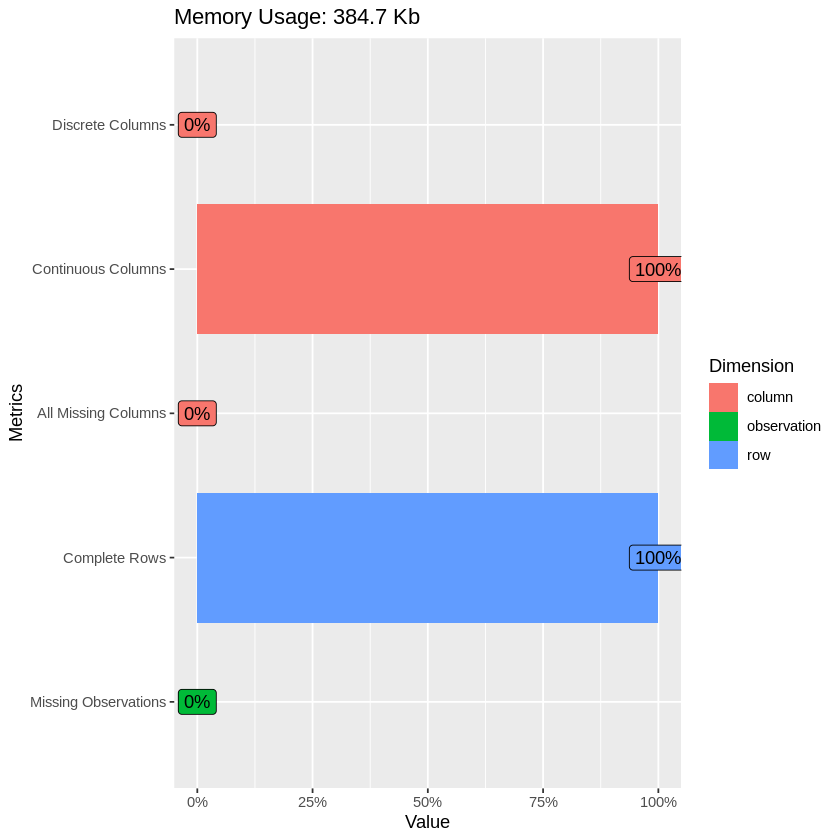

In [103]:
plot_intro(df)

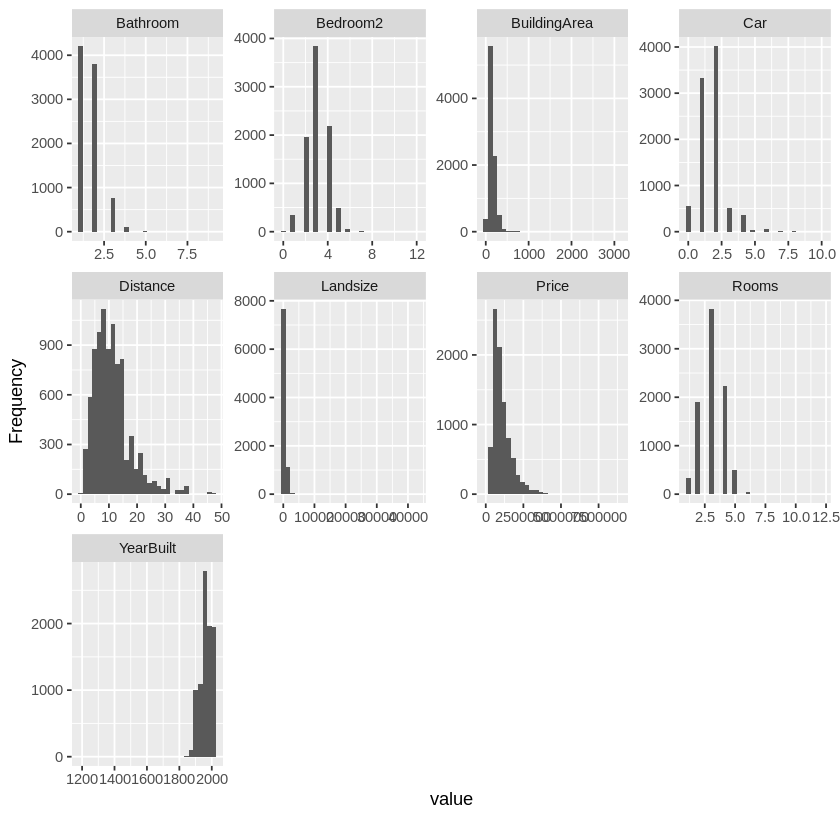

In [104]:
plot_histogram(df)

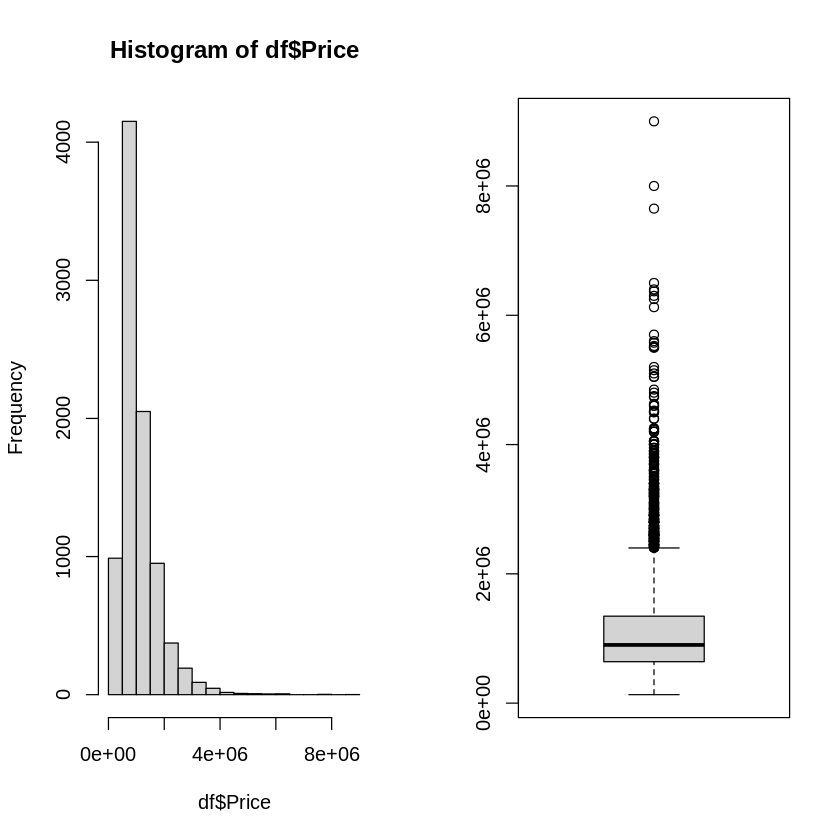

In [105]:
par(mfrow = c(1, 2))
hist(df$Price)
boxplot(df$Price)

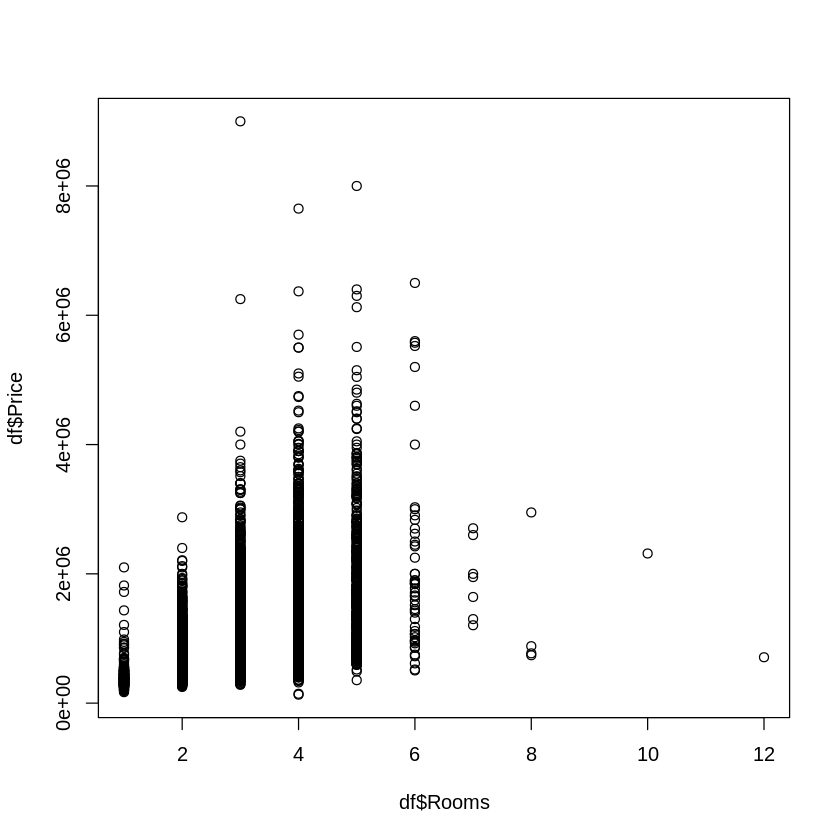

In [106]:
plot(df$Price~df$Rooms)

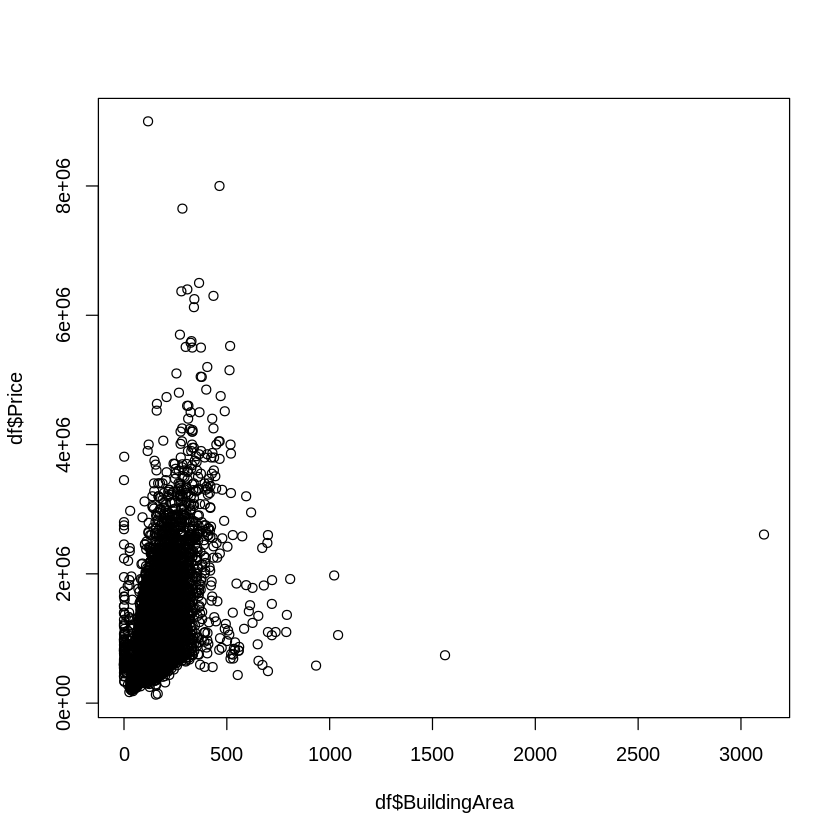

In [107]:
plot(df$Price~df$BuildingArea)

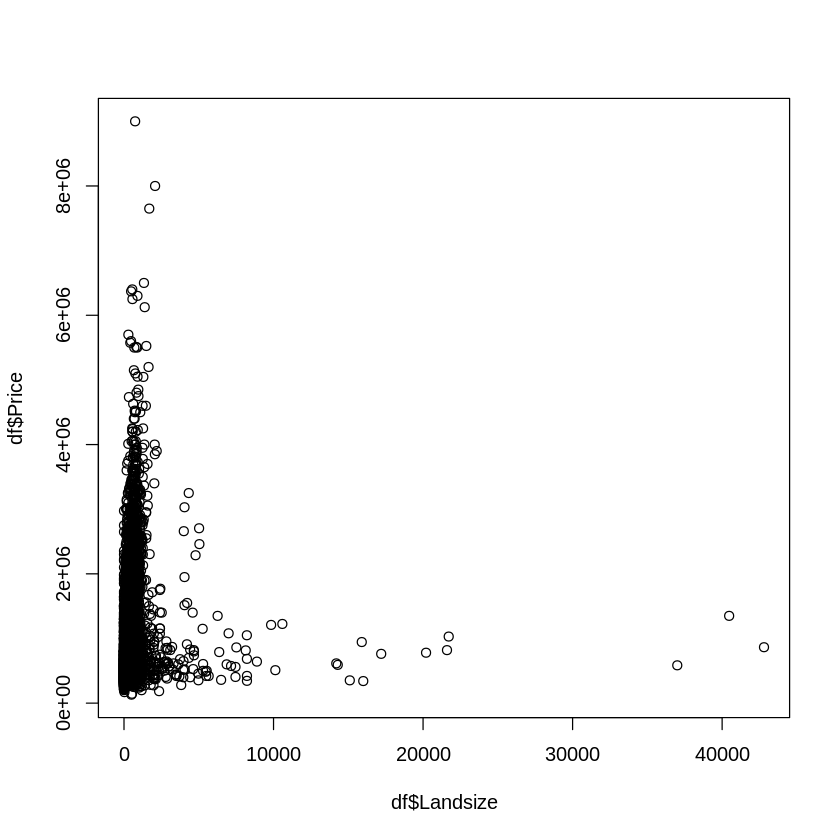

In [108]:
plot(df$Price~df$Landsize)

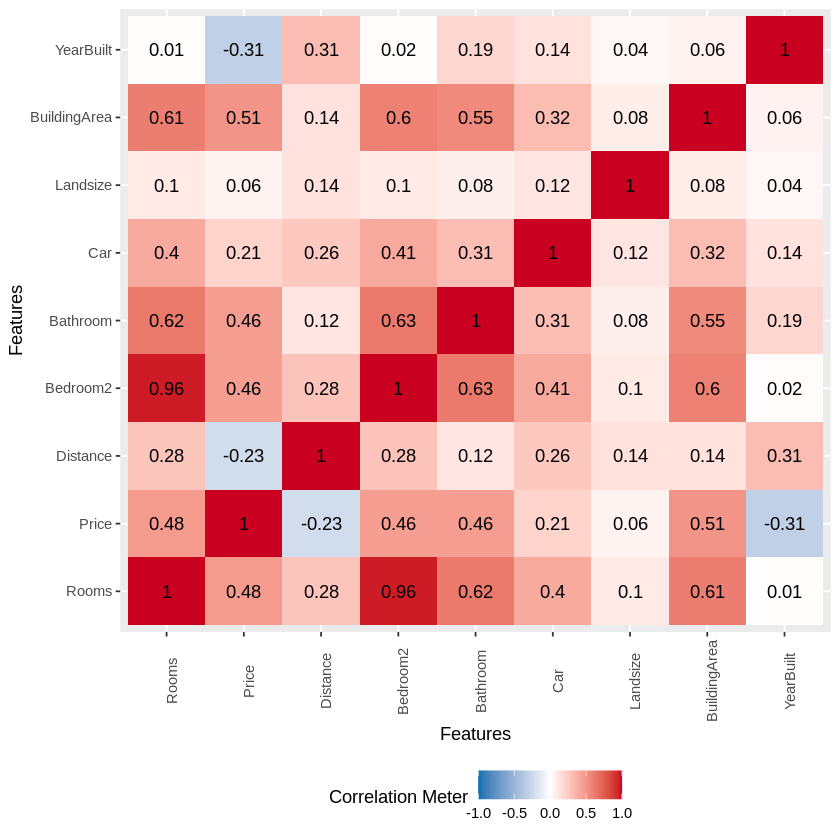

In [109]:
plot_correlation(na.omit(df), maxcat = 5L)

## Outlier Detection

In [110]:
df3 <- df

### Rooms

[1] 0.3272544

[1] 4.379451

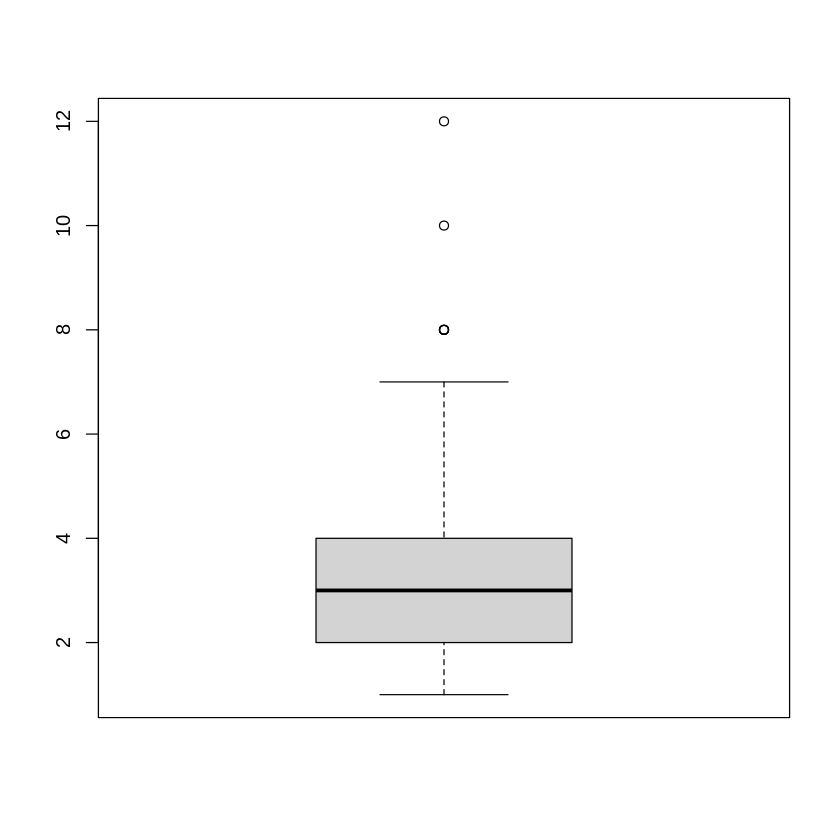

In [111]:
# check outliers in Rooms
skewness(df3$Rooms)
kurtosis(df3$Rooms)
boxplot(df3$Rooms)

In [112]:
# identify the  outliers
outliers <- boxplot.stats(df3$Rooms)$out
head(outliers)

[1]  8  8  8  8 10 12

In [113]:
df3 <- subset(df3, df3$Rooms < 10)

### Price

[1] 2.411947

[1] 14.0449

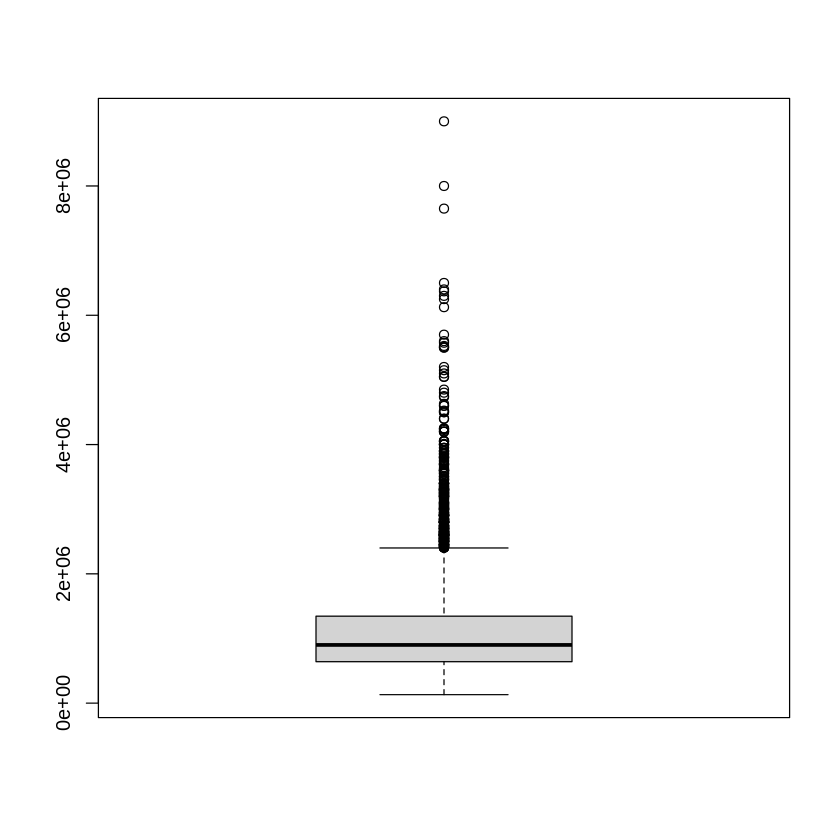

In [114]:
# check outliers in Price
skewness(df3$Price)
kurtosis(df3$Price)
boxplot(df3$Price)

In [115]:
# identify the  outliers
outliers <- boxplot.stats(df3$Price)$out
head(sort(outliers, decreasing = TRUE))

[1] 9000000 8000000 7650000 6500000 6400000 6370000

In [116]:
df3 <- subset(df3, df3$Price < 7650000)

### Building Area

[1] 6.519406

[1] 163.5882

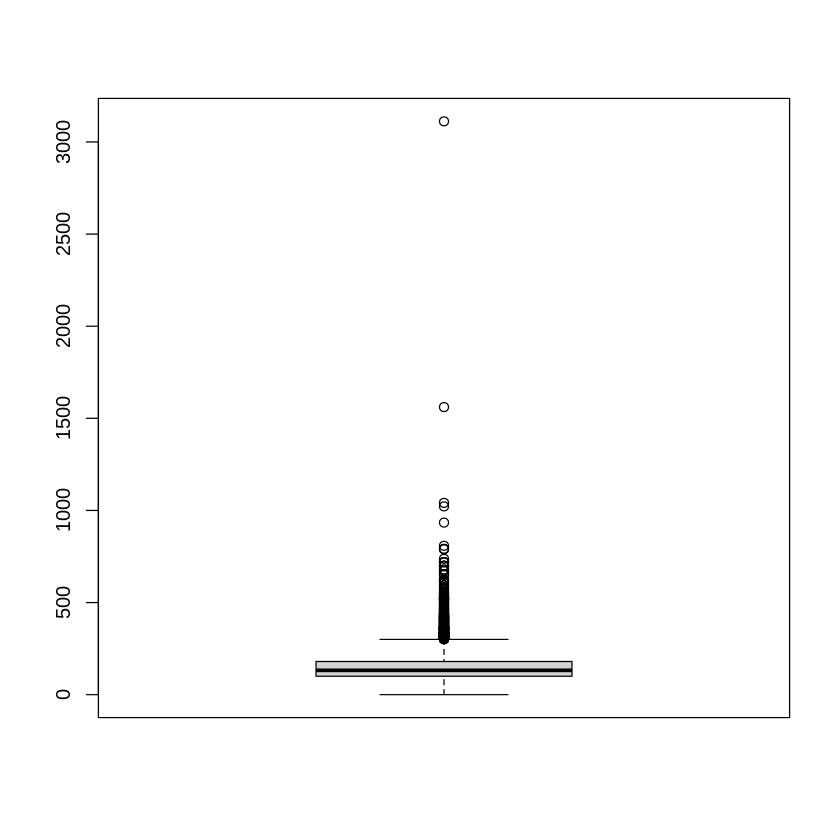

In [117]:
# check outliers in Building area
skewness(df3$BuildingArea)
kurtosis(df3$BuildingArea)
boxplot(df3$BuildingArea)

In [118]:
# identify the  outliers
outliers <- boxplot.stats(df3$BuildingArea)$out
head(sort(outliers, decreasing = TRUE))

[1] 3112 1561 1041 1022  934  808

In [119]:
min(df3$BuildingArea)

[1] 0

In [120]:
df3 <- subset(df3, df3$BuildingArea < 1500)
df3 <- subset(df3, df3$BuildingArea > 0)

### Landsize

[1] 23.14063

[1] 749.203

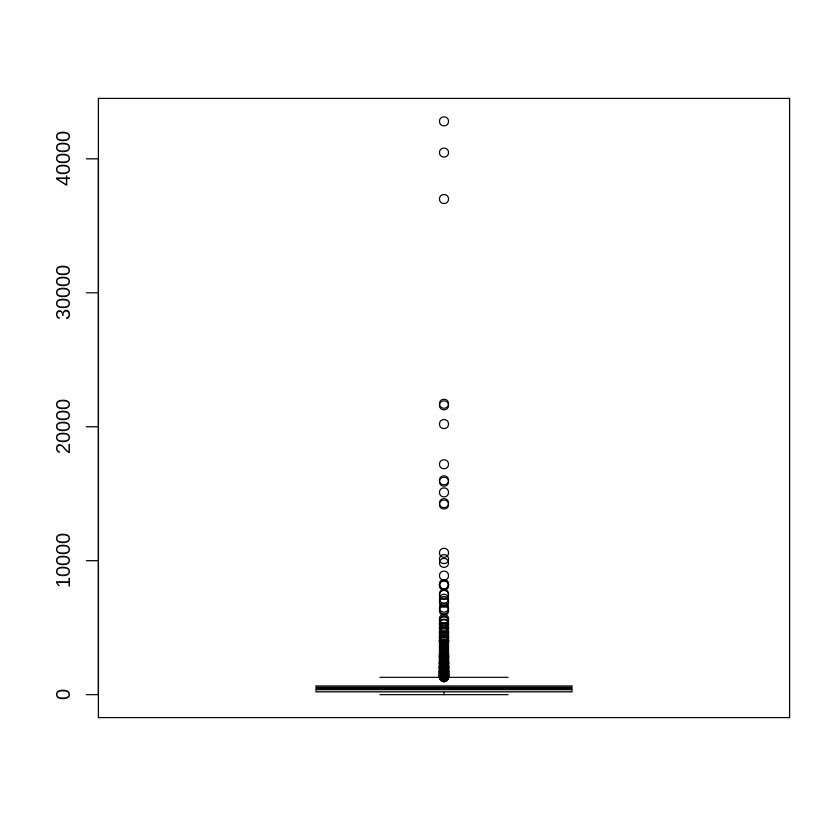

In [121]:
# check outliers in landsize
skewness(df3$Landsize)
kurtosis(df3$Landsize)
boxplot(df3$Landsize)

In [122]:
# identify the  outliers
outliers <- boxplot.stats(df3$Landsize)$out
head(sort(outliers, decreasing = TRUE))

[1] 42800 40469 37000 21715 21600 20200

In [123]:
df3 <- subset(df3, df3$Landsize < 30000)

### Distance

[1] 1.539607

[1] 6.584919

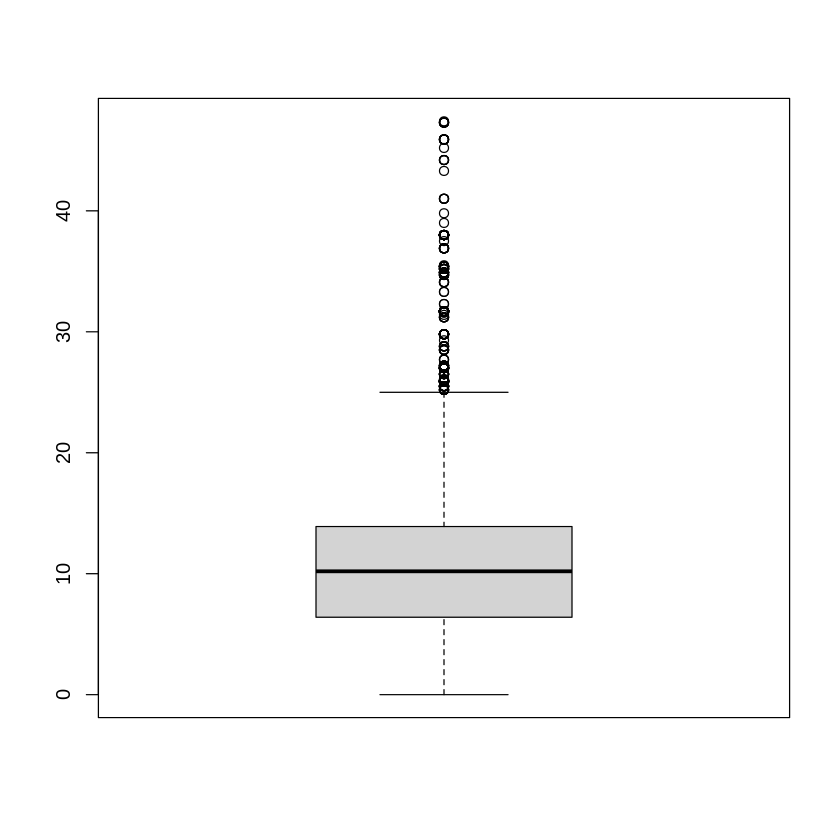

In [124]:
skewness(df3$Distance)
kurtosis(df3$Distance)
boxplot(df3$Distance)

In [125]:
# identify the  outliers
outliers <- boxplot.stats(df3$Distance)$out
head(sort(outliers, decreasing = TRUE), n=10)

# didn't remove since there were no obvious outliers as there are quite a few data points for on the higher end

[1] 47.4 47.3 47.3 47.3 47.3 47.3 47.3 47.3 45.9 45.9

### Bedroom2

[1] 0.2434666

[1] 3.67304

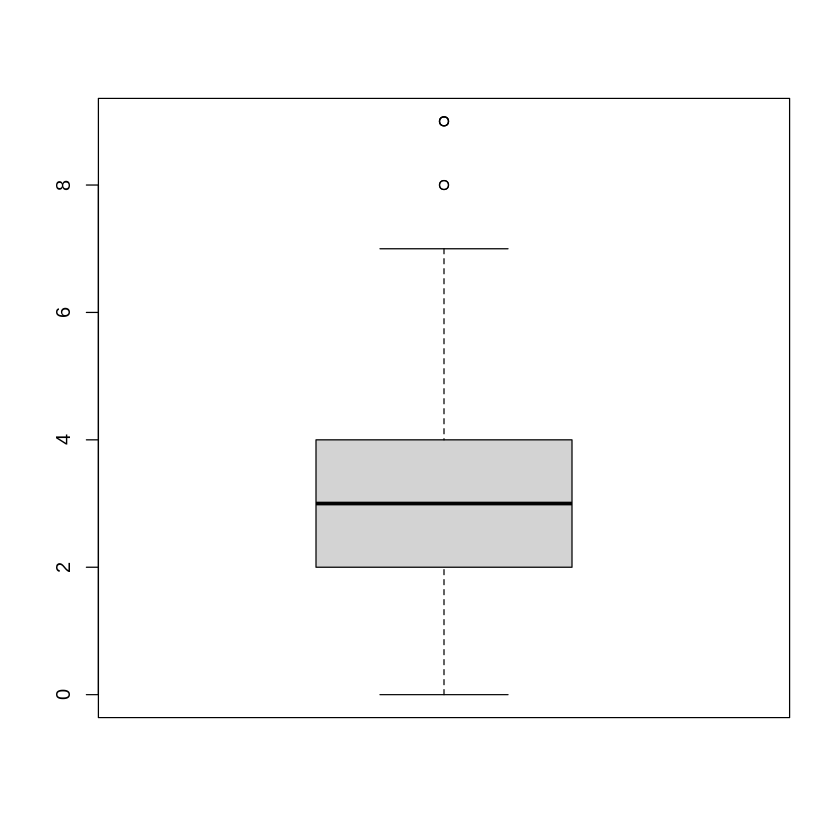

In [126]:
skewness(df3$Bedroom2)
kurtosis(df3$Bedroom2)
boxplot(df3$Bedroom2)

In [127]:
# identify the  outliers
outliers <- boxplot.stats(df3$Bedroom2)$out
head(sort(outliers, decreasing = TRUE))

[1] 9 9 9 8 8

In [128]:
df3 <- subset(df3, df3$Bedroom2 < 8)

### Bathroom

[1] 1.043635

[1] 4.513718

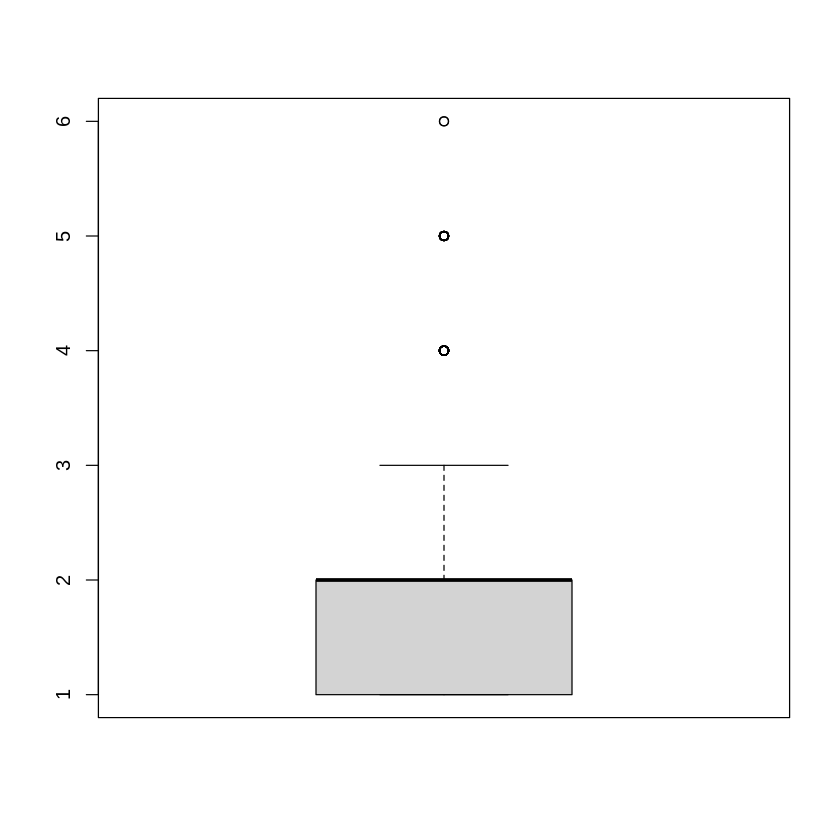

In [129]:
skewness(df3$Bathroom)
kurtosis(df3$Bathroom)
boxplot(df3$Bathroom)

In [130]:
# identify the  outliers
outliers <- boxplot.stats(df3$Bathroom)$out
head(sort(outliers, decreasing = TRUE), n=10)

[1] 6 6 5 5 5 5 5 5 5 5

In [131]:
df3 <- subset(df3, df3$Bathroom < 6)

### Car

[1] 1.394645

[1] 8.176972

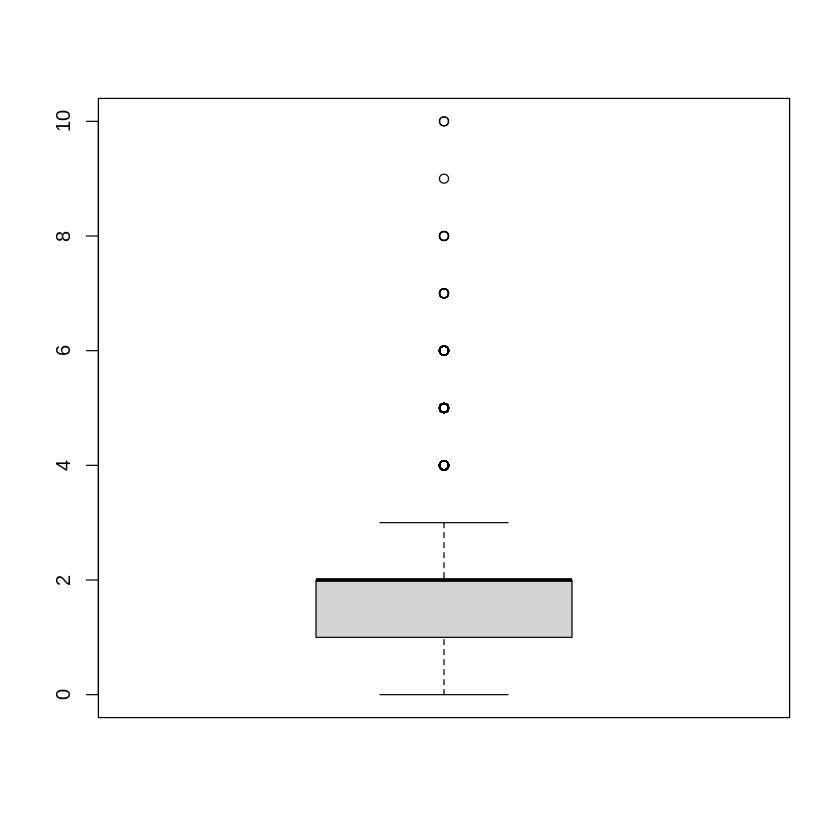

In [132]:
skewness(df3$Car)
kurtosis(df3$Car)
boxplot(df3$Car)

In [133]:
# identify the  outliers
outliers <- boxplot.stats(df3$Car)$out
head(sort(outliers, decreasing = TRUE), n=20)

[1] 10 10  9  8  8  8  8  7  7  7  7  7  7  7  6  6  6  6  6  6

In [134]:
df3 <- subset(df3, df3$Car < 6)

### Year Built

[1] -1.497528

[1] 23.30341

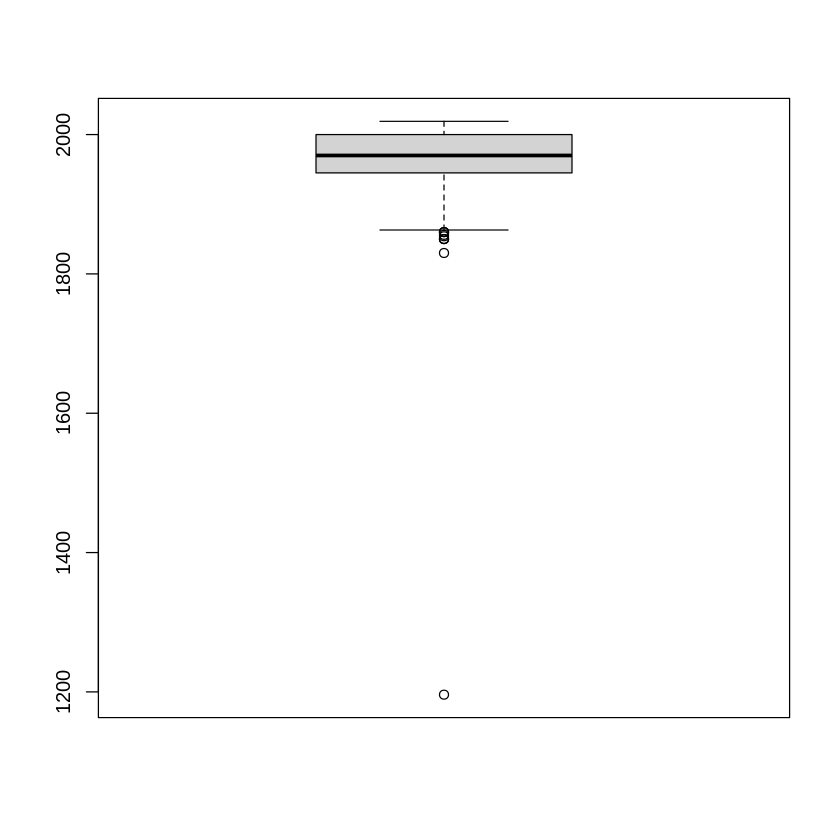

In [135]:
skewness(df3$YearBuilt)
kurtosis(df3$YearBuilt)
boxplot(df3$YearBuilt)

In [136]:
# identify the  outliers
outliers <- boxplot.stats(df3$YearBuilt)$out
head(sort(outliers, decreasing = FALSE))

[1] 1196 1830 1850 1850 1850 1854

In [137]:
df3 <- subset(df3, df3$YearBuilt > 1800)

# Clustering Models

## With Outliers

In [138]:
df1 <- as.matrix(df)

### Hierarchical Clustering

In [139]:
xsc<-scale(df1)
y<-dist(xsc)

In [140]:
hc.complete<-hclust(y,method="complete")
hc.average<-hclust(y,method="average")
hc.single<-hclust(y,method="single")


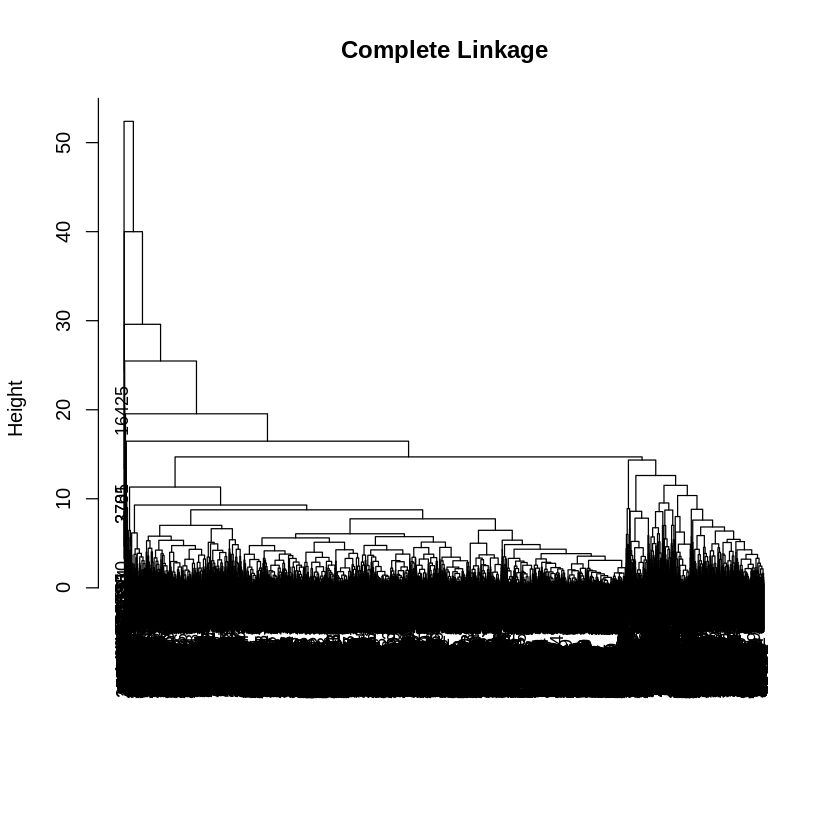

In [141]:
plot(hc.complete,main="Complete Linkage", xlab=" ",sub=" ", cex=.9)
#plot(hc.average,main="Average Linkage", xlab=" ",sub=" ", cex=0.9)
#plot(hc.single,main="Single Linkage", xlab=" ", sub=" ",cex=0.9)



In [142]:
group<-cutree(hc.complete,10)

In [143]:
df2<-cbind.data.frame(df1,group,houses$Address)
df2


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,group,houses$Address
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
3,2,1035000,2.5,2,1,0,156,79,1900,1,25 Bloomburg St
5,3,1465000,2.5,3,2,0,134,150,1900,1,5 Charles St
7,4,1600000,2.5,3,1,2,120,142,2014,1,55a Park St
12,3,1876000,2.5,4,2,0,245,210,1910,1,124 Yarra St
15,2,1636000,2.5,2,1,2,256,107,1890,1,98 Charles St
19,2,1097000,2.5,3,1,2,220,75,1900,1,10 Valiant St
25,3,1350000,2.5,3,2,2,214,190,2005,1,40 Nicholson St
26,2,750000,2.5,2,2,1,0,94,2009,1,123/56 Nicholson St
31,2,1310000,2.5,2,1,2,238,97,1890,1,16 William St


In [144]:
library(purrr)

df2 %>% split(.$group) %>% map(summary)

$`1`
     Rooms           Price            Distance        Bedroom2    
 Min.   :1.000   Min.   : 131000   Min.   : 0.00   Min.   :0.000  
 1st Qu.:2.000   1st Qu.: 610000   1st Qu.: 5.90   1st Qu.:2.000  
 Median :3.000   Median : 858000   Median : 9.20   Median :3.000  
 Mean   :2.842   Mean   : 999428   Mean   :10.38   Mean   :2.822  
 3rd Qu.:3.000   3rd Qu.:1290000   3rd Qu.:13.50   3rd Qu.:3.000  
 Max.   :6.000   Max.   :3750000   Max.   :47.30   Max.   :6.000  
    Bathroom          Car          Landsize       BuildingArea     YearBuilt   
 Min.   :1.000   Min.   :0.00   Min.   :   0.0   Min.   :  0.0   Min.   :1830  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.: 168.0   1st Qu.: 92.0   1st Qu.:1935  
 Median :1.000   Median :1.00   Median : 396.0   Median :120.0   Median :1965  
 Mean   :1.452   Mean   :1.44   Mean   : 449.1   Mean   :126.4   Mean   :1961  
 3rd Qu.:2.000   3rd Qu.:2.00   3rd Qu.: 616.0   3rd Qu.:153.0   3rd Qu.:1992  
 Max.   :3.000   Max.   :5.00   Max.   :8888.0

In [145]:
describeBy(df2$Price, df2$group, mat = TRUE) 

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,6908,999427.6,526872.4,858000,932840.6,455158.2,131000,3750000,3619000,1.25203371,1.7084462,6339.125
X12,2,2,1,1862,1359990.7,856910.3,1050000,1213939.2,526323.0,295000,6300000,6005000,1.66120716,2.9835442,19858.458
X13,3,3,1,37,4868067.6,1390307.5,4200000,4677612.9,889560.0,3450000,9000000,5550000,1.16251771,0.6309799,228565.139
X14,4,4,1,5,1497200.0,1060587.9,760000,1497200.0,74130.0,710000,2950000,2240000,0.38714382,-2.0687529,474309.329
X15,5,5,1,56,1272660.7,525737.3,1136500,1225793.5,469242.9,495000,2600000,2105000,0.77348199,-0.0787208,70254.597
X16,6,6,1,1,2608000.0,NA,2608000,2608000.0,0.0,2608000,2608000,0,NA,NA,NA
X17,7,7,1,1,741000.0,NA,741000,741000.0,0.0,741000,741000,0,NA,NA,NA
X18,8,8,1,13,772730.8,287387.8,780000,770818.2,278728.8,341500,1225000,883500,0.05415375,-1.2414383,79707.028
X19,9,9,1,3,933333.3,387050.8,865000,933333.3,415128.0,585000,1350000,765000,0.17104581,-2.3333333,223463.892


In [146]:
describeBy(df2$Car, df2$group, mat = TRUE) 

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,6908,1.440214,0.7303538,1,1.454776,1.4826,0,5,5,0.2311329,0.6063096,0.008787333
X12,2,2,1,1862,2.606337,1.1775358,2,2.468456,0.0000,0,10,10,1.5525523,3.4518855,0.027288791
X13,3,3,1,37,2.054054,0.8802129,2,2.000000,0.0000,0,4,4,0.3753511,0.3076182,0.144706112
X14,4,4,1,5,3.600000,2.0736441,3,3.600000,1.4826,2,7,5,0.6944297,-1.4110763,0.927361850
X15,5,5,1,56,1.767857,0.7383291,2,1.695652,0.0000,0,4,4,0.6469179,1.3675829,0.098663377
X16,6,6,1,1,4.000000,NA,4,4.000000,0.0000,4,4,0,NA,NA,NA
X17,7,7,1,1,1.000000,NA,1,1.000000,0.0000,1,1,0,NA,NA,NA
X18,8,8,1,13,1.923077,1.8912755,1,1.454545,0.0000,1,8,7,2.4892030,5.2297738,0.524545450
X19,9,9,1,3,3.333333,4.1633320,2,3.333333,2.9652,0,8,8,0.2874095,-2.3333333,2.403700850


### k-Means Clustering Analysis

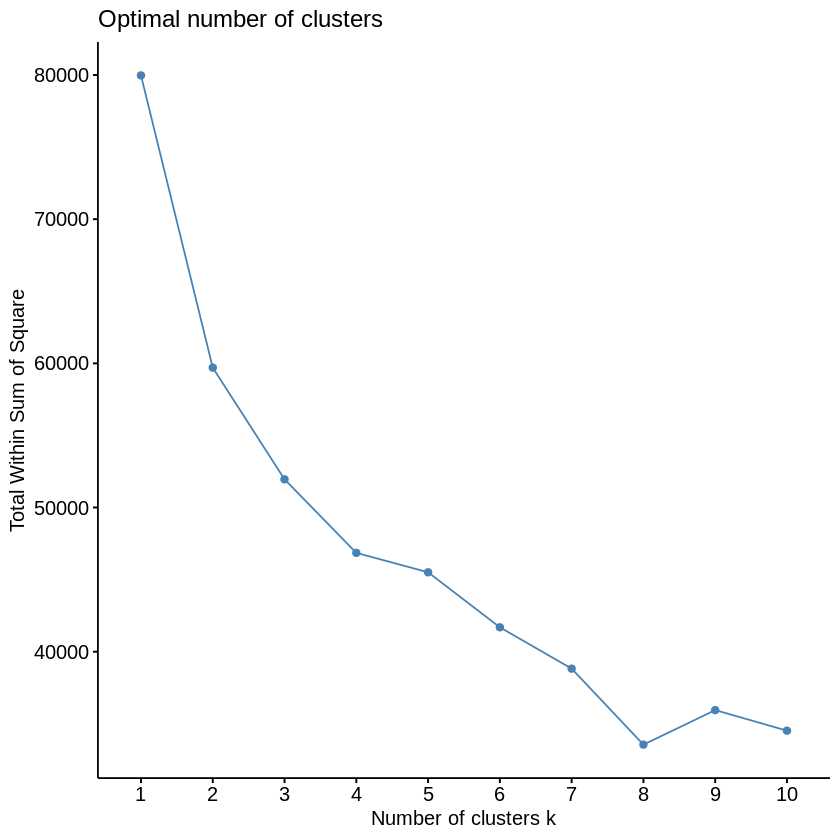

In [147]:
#Get optimal number of clusters

fviz_nbclust(xsc, kmeans, method = "wss")

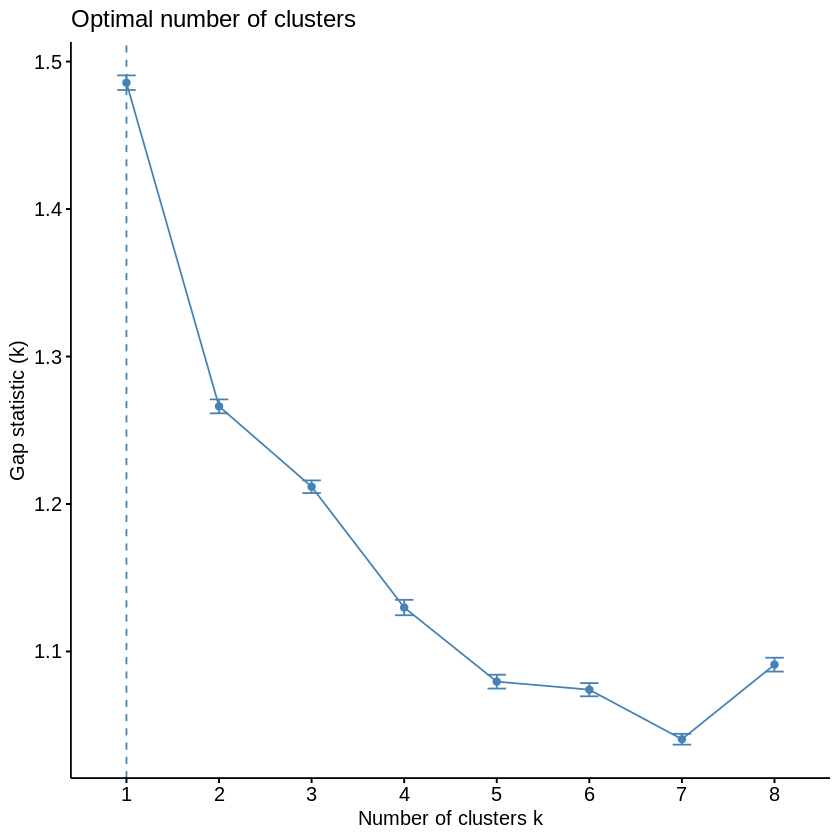

In [148]:
#calculate gap statistic based on number of clusters
gap_stat <- clusGap(df1,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 8,
                    B = 50)

#plot number of clusters vs. gap statistic
fviz_gap_stat(gap_stat)


In [149]:
#make this example reproducible
set.seed(1)

#perform k-means clustering with k = 4 clusters
km <- kmeans(df1, centers = 5, nstart = 25)

#view results
km

K-means clustering with 5 clusters of sizes 1754, 3601, 94, 2829, 609

Cluster means:
     Rooms     Price  Distance Bedroom2 Bathroom      Car Landsize BuildingArea
1 3.530787 1590463.8  8.944983 3.488597 1.888826 1.792474 547.8660     181.9654
2 2.652319  584322.6 13.157401 2.646765 1.371563 1.522633 479.9170     112.4556
3 4.425532 4424510.6  7.371277 4.382979 2.989362 2.670213 856.3617     327.8436
4 3.152351 1008559.5 10.872428 3.130788 1.631318 1.723224 519.4366     147.6795
5 4.042693 2544628.5  8.231691 4.001642 2.436782 2.111658 678.2397     253.1866
  YearBuilt
1  1948.243
2  1981.116
3  1948.840
4  1961.987
5  1945.453

Clustering vector:
    3     5     7    12    15    19    25    26    31    33    36    38    39 
    4     1     1     1     1     4     1     2     1     4     4     4     1 
   43    44    45    50    52    57    58    59    60    62    64    67    68 
    2     4     1     1     4     4     2     4     4     4     4     4     2 
   69    71    72    73   

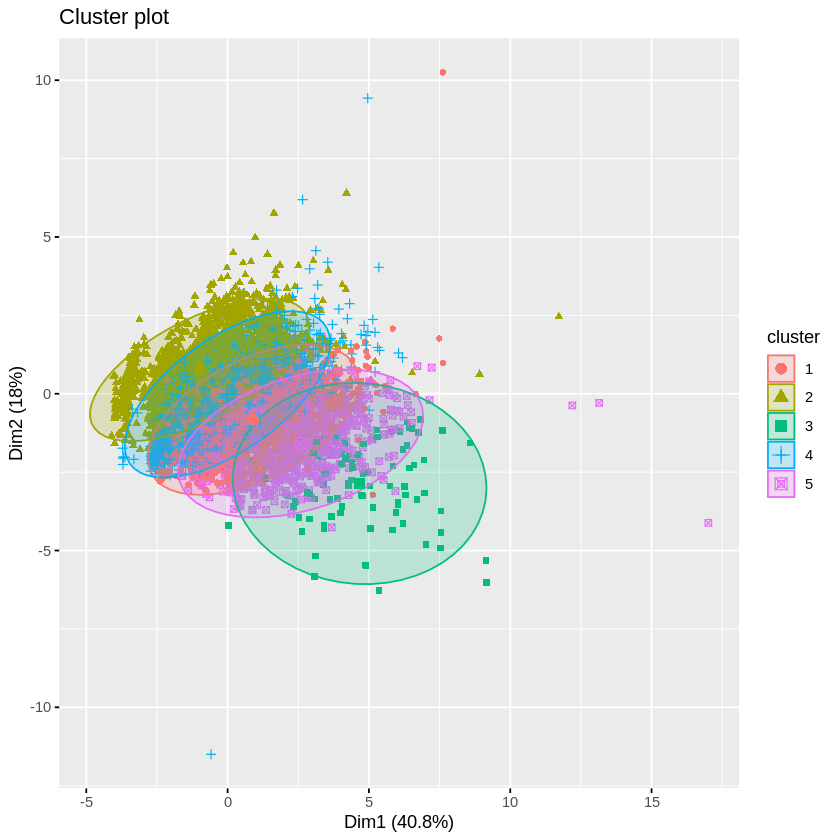

In [150]:
fviz_cluster(km, data = df1, geom = "point", ellipse.type = "norm")

In [151]:
aggregate(df1, by=list(cluster=km$cluster), mean)

cluster,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.530787,1590463.8,8.944983,3.488597,1.888826,1.792474,547.8660,181.9654,1948.243
2,2.652319,584322.6,13.157401,2.646765,1.371563,1.522633,479.9170,112.4556,1981.116
3,4.425532,4424510.6,7.371277,4.382979,2.989362,2.670213,856.3617,327.8436,1948.840
4,3.152351,1008559.5,10.872428,3.130788,1.631318,1.723224,519.4366,147.6795,1961.987
5,4.042693,2544628.5,8.231691,4.001642,2.436782,2.111658,678.2397,253.1866,1945.453


In [152]:
final_data <- cbind(houses, cluster = km$cluster)

In [153]:
head(final_data)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,cluster
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,⋯,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,4
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,⋯,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,1
7,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,⋯,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019,1
12,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,⋯,0,245,210,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019,1
15,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,⋯,2,256,107,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019,1
19,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,3067,⋯,2,220,75,1900,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019,4


## Without Outliers

In [154]:
df3 <- as.matrix(df3)

### Hierarchical Clustering

In [155]:
xsc<-scale(df3)
y<-dist(xsc)

In [156]:
hc.complete<-hclust(y,method="complete")
hc.average<-hclust(y,method="average")
hc.single<-hclust(y,method="single")


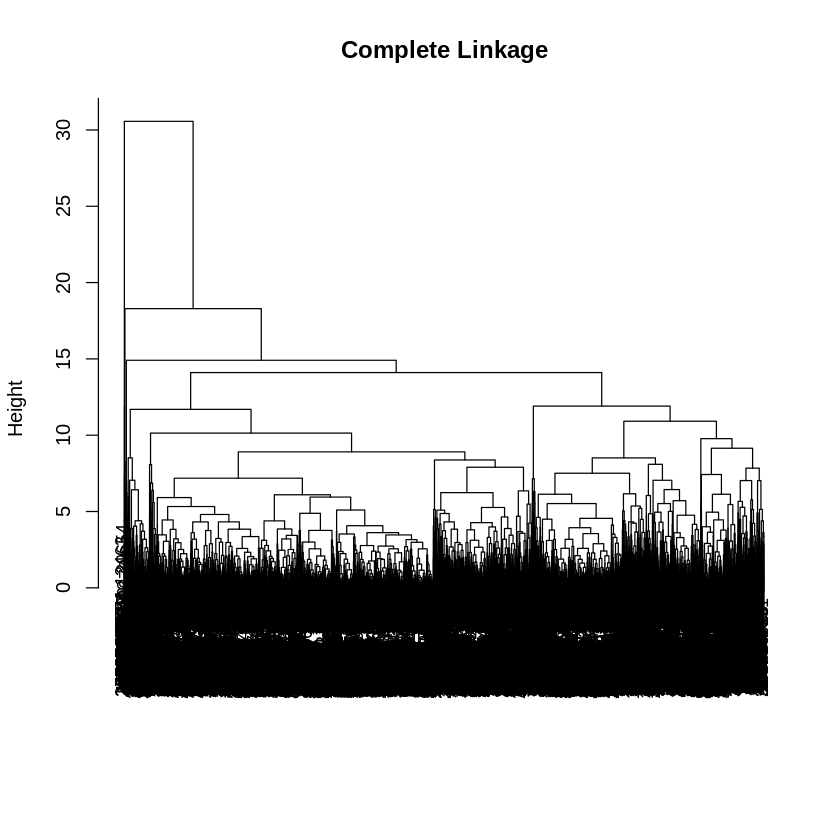

In [157]:
plot(hc.complete,main="Complete Linkage", xlab=" ",sub=" ", cex=.9)
#plot(hc.average,main="Average Linkage", xlab=" ",sub=" ", cex=0.9)
#plot(hc.single,main="Single Linkage", xlab=" ", sub=" ",cex=0.9)



In [158]:
group<-cutree(hc.complete,4)

In [159]:
houses2 <- houses %>%
  filter(
    Rooms < 10,
    Price < 7650000,
    BuildingArea < 1500,
    BuildingArea > 0,
    Landsize < 30000,
    Bedroom2 < 8,
    Bathroom < 6,
    Car < 6,
    YearBuilt > 1800
  )

In [160]:
df4<-cbind.data.frame(df3,group,houses2$Address)
df4


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,group,houses2$Address
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
3,2,1035000,2.5,2,1,0,156,79,1900,1,25 Bloomburg St
5,3,1465000,2.5,3,2,0,134,150,1900,1,5 Charles St
7,4,1600000,2.5,3,1,2,120,142,2014,1,55a Park St
12,3,1876000,2.5,4,2,0,245,210,1910,1,124 Yarra St
15,2,1636000,2.5,2,1,2,256,107,1890,1,98 Charles St
19,2,1097000,2.5,3,1,2,220,75,1900,1,10 Valiant St
25,3,1350000,2.5,3,2,2,214,190,2005,1,40 Nicholson St
26,2,750000,2.5,2,2,1,0,94,2009,1,123/56 Nicholson St
31,2,1310000,2.5,2,1,2,238,97,1890,1,16 William St


In [161]:
df4$price_area <- df4$Price / df4$BuildingArea

In [162]:
library(purrr)

df4 %>% split(.$group) %>% map(summary)

$`1`
     Rooms           Price            Distance        Bedroom2    
 Min.   :1.000   Min.   : 131000   Min.   : 0.00   Min.   :0.000  
 1st Qu.:2.000   1st Qu.: 641000   1st Qu.: 6.40   1st Qu.:2.000  
 Median :3.000   Median : 900000   Median :10.20   Median :3.000  
 Mean   :3.089   Mean   :1087320   Mean   :11.15   Mean   :3.066  
 3rd Qu.:4.000   3rd Qu.:1340000   3rd Qu.:13.90   3rd Qu.:4.000  
 Max.   :8.000   Max.   :6400000   Max.   :47.40   Max.   :7.000  
    Bathroom          Car           Landsize       BuildingArea  
 Min.   :1.000   Min.   :0.000   Min.   :   0.0   Min.   :  1.0  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 208.5   1st Qu.:100.0  
 Median :2.000   Median :2.000   Median : 468.0   Median :132.0  
 Mean   :1.639   Mean   :1.655   Mean   : 472.2   Mean   :147.5  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.: 650.0   3rd Qu.:180.0  
 Max.   :5.000   Max.   :5.000   Max.   :5530.0   Max.   :575.0  
   YearBuilt        group   houses2$Address      price_area     

In [163]:
describeBy(df4$Price, df4$group, mat = TRUE) 

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,8707,1087320.4,661922.9,900000,985510.9,467019.0,131000,6400000,6269000,2.1257498,7.4422754,7093.706
X12,2,2,1,26,1419769.2,583978.2,1357500,1398204.5,646784.2,495000,2600000,2105000,0.3101581,-0.8228507,114527.552
X13,3,3,1,9,693166.7,240150.6,762500,693166.7,252783.3,341500,1030000,688500,-0.2192008,-1.4587215,80050.201
X14,4,4,1,18,704527.8,303574.6,621250,686656.2,297632.0,345000,1350000,1005000,0.6436857,-0.8547386,71553.222


In [164]:
describeBy(df4$price_area, df4$group, mat = TRUE) 

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,8707,9894.181,50422.823,7229.437,7395.377,2899.9652,786.6184,3812000.000,3811213.382,53.7328902,3779.2454274,540.3721
X12,2,2,1,26,2023.975,881.059,1977.389,2000.408,860.3589,621.5203,3714.286,3092.765,0.2773085,-0.9096582,172.7899
X13,3,3,1,9,7106.807,2376.611,7151.163,7106.807,3234.2412,4126.9841,10404.040,6277.056,0.1454016,-1.8461159,792.2037
X14,4,4,1,18,7903.553,1979.517,7950.851,7915.488,1061.5796,4077.6699,11538.462,7460.792,-0.4028165,-0.3984077,466.5767


In [165]:
describeBy(df4$Car, df4$group, mat = TRUE) 

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,8707,1.655220,0.8848841,2,1.583321,1.4826,0,5,5,0.7253408,1.3446723,0.009483139
X12,2,2,1,26,1.692308,0.6176880,2,1.727273,0.0000,0,3,3,-0.7242587,0.4047913,0.121138583
X13,3,3,1,9,1.333333,0.5000000,1,1.333333,0.0000,1,2,1,0.5925926,-1.8148148,0.166666667
X14,4,4,1,18,1.333333,0.4850713,1,1.312500,0.0000,1,2,1,0.6490074,-1.6620370,0.114332390


### k-Means Clustering Analysis

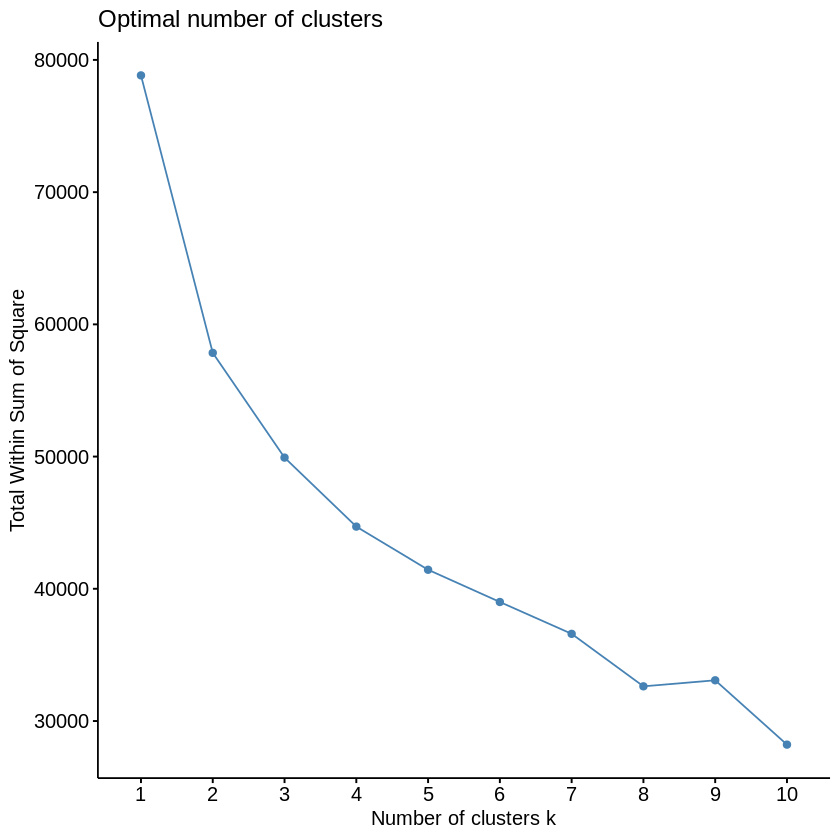

In [166]:
#Get optimal number of clusters

fviz_nbclust(xsc, kmeans, method = "wss")

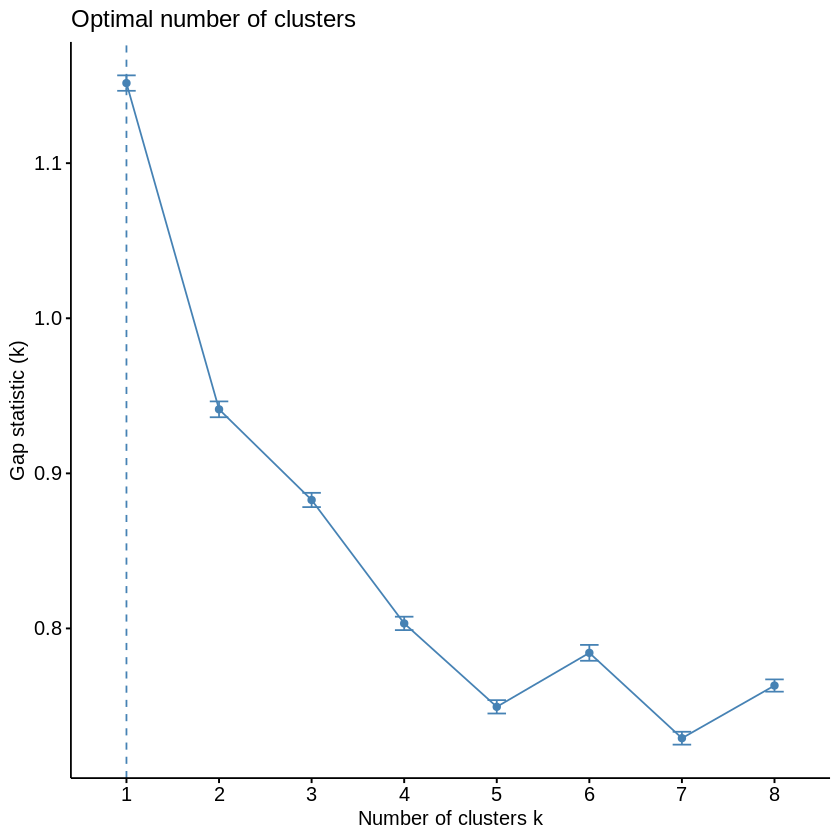

In [167]:
#calculate gap statistic based on number of clusters
gap_stat <- clusGap(df3,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 8,
                    B = 50)

#plot number of clusters vs. gap statistic
fviz_gap_stat(gap_stat)


#### 5 clusters

In [168]:
#make this example reproducible
set.seed(1)

#perform k-means clustering with k = 5 clusters
km <- kmeans(df3, centers = 5, nstart = 25)

#view results
km

K-means clustering with 5 clusters of sizes 2783, 147, 1712, 612, 3506

Cluster means:
     Rooms     Price  Distance Bedroom2 Bathroom      Car Landsize BuildingArea
1 3.139059  998275.8 10.858246 3.117499 1.627381 1.696371 500.6597     147.5420
2 4.333333 3884870.0  7.451020 4.258503 2.952381 2.428571 774.4558     312.5034
3 3.497079 1559416.4  8.941881 3.455607 1.859813 1.728388 516.5683     179.1505
4 3.988562 2398048.0  8.318627 3.949346 2.343137 2.016340 650.3382     242.8099
5 2.636908  580869.6 13.108329 2.627781 1.361380 1.489161 465.6666     112.1702
  YearBuilt
1  1962.685
2  1951.803
3  1947.844
4  1945.472
5  1981.094

Clustering vector:
    3     5     7    12    15    19    25    26    31    33    36    38    39 
    1     3     3     3     3     1     3     5     3     1     1     1     3 
   43    44    45    50    52    57    58    59    60    62    64    67    68 
    5     1     3     3     1     3     5     1     1     1     1     1     5 
   69    71    72    73  

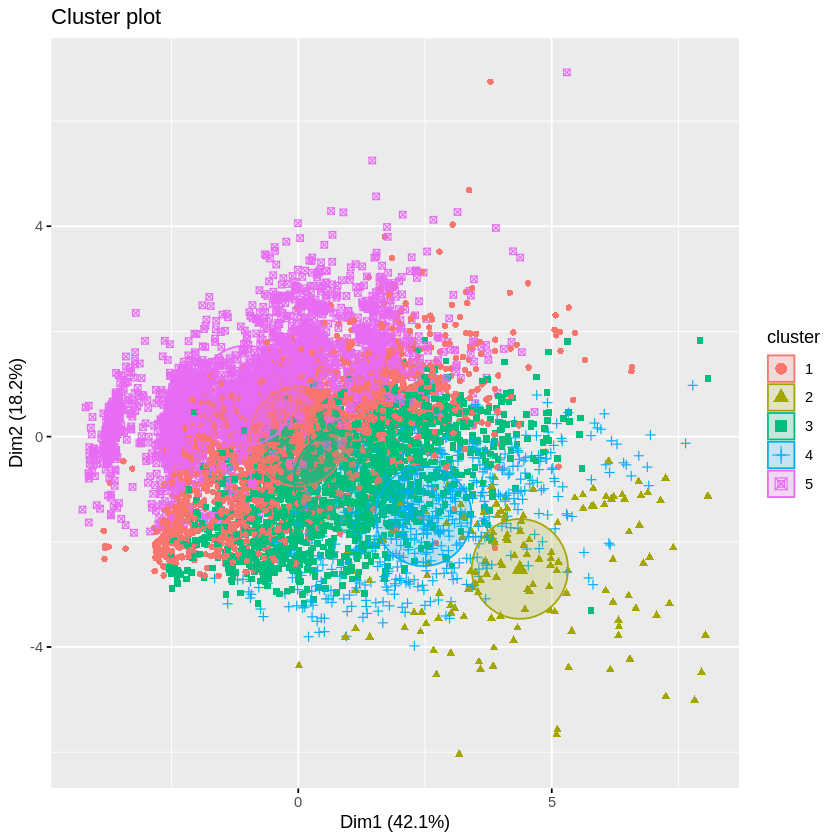

In [169]:
fviz_cluster(km, data = df3, geom = "point", ellipse.type = "euclid")

In [170]:
# Cluster means
km$centers

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,3.139059,998275.8,10.858246,3.117499,1.627381,1.696371,500.6597,147.5420,1962.685
2,4.333333,3884870.0,7.451020,4.258503,2.952381,2.428571,774.4558,312.5034,1951.803
3,3.497079,1559416.4,8.941881,3.455607,1.859813,1.728388,516.5683,179.1505,1947.844
4,3.988562,2398048.0,8.318627,3.949346,2.343137,2.016340,650.3382,242.8099,1945.472
5,2.636908,580869.6,13.108329,2.627781,1.361380,1.489161,465.6666,112.1702,1981.094


In [171]:
final_data2 <- cbind(houses2, cluster = km$cluster)

In [172]:
final_data2$price_area <- final_data2$Price / final_data2$BuildingArea

In [173]:
head(final_data2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,cluster,price_area
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,⋯,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,1,13101.266
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,⋯,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,3,9766.667
7,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,⋯,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019,3,11267.606
12,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,⋯,245,210,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019,3,8933.333
15,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,⋯,256,107,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019,3,15289.720
19,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,3067,⋯,220,75,1900,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019,1,14626.667


In [174]:
# summarize clusters by property type
type_table <- table(final_data2$cluster, final_data2$Type)
type_table

   
       h    t    u
  1 2264  307  212
  2  146    1    0
  3 1602   86   24
  4  597   13    2
  5 1898  310 1298

In [175]:
# convert table to proportions
round(prop.table(type_table),2)

   
       h    t    u
  1 0.26 0.04 0.02
  2 0.02 0.00 0.00
  3 0.18 0.01 0.00
  4 0.07 0.00 0.00
  5 0.22 0.04 0.15

In [176]:
final_data2$Distance <- as.numeric(final_data2$Distance)
mean_distance <- aggregate(Distance ~ cluster, data = final_data2, FUN = mean)
mean_distance

cluster,Distance
<int>,<dbl>
1,10.858246
2,7.451020
3,8.941881
4,8.318627
5,13.108329


In [177]:
mean_area <- aggregate(BuildingArea ~ cluster, data = final_data2, FUN = mean)
mean_area

cluster,BuildingArea
<int>,<dbl>
1,147.5420
2,312.5034
3,179.1505
4,242.8099
5,112.1702


In [178]:
mean_ls <- aggregate(Landsize ~ cluster, data = final_data2, FUN = mean)
mean_ls

cluster,Landsize
<int>,<dbl>
1,500.6597
2,774.4558
3,516.5683
4,650.3382
5,465.6666


In [179]:
mean_pa <- aggregate(price_area ~ cluster, data = final_data2, FUN = mean)
mean_pa

cluster,price_area
<int>,<dbl>
1,10021.21
2,39356.54
3,10940.35
4,11435.25
5,7702.45


In [180]:
mean_yr <- aggregate(YearBuilt ~ cluster, data = final_data2, FUN = mean)
mean_yr

cluster,YearBuilt
<int>,<dbl>
1,1962.685
2,1951.803
3,1947.844
4,1945.472
5,1981.094


In [181]:
table_region <- table(final_data2$cluster, final_data2$Regionname)
round(prop.table(table_region),2)

   
    Eastern Metropolitan Eastern Victoria Northern Metropolitan
  1                 0.05             0.00                  0.10
  2                 0.00             0.00                  0.00
  3                 0.03             0.00                  0.04
  4                 0.01             0.00                  0.01
  5                 0.02             0.00                  0.15
   
    Northern Victoria South-Eastern Metropolitan Southern Metropolitan
  1              0.00                       0.02                  0.07
  2              0.00                       0.00                  0.02
  3              0.00                       0.00                  0.10
  4              0.00                       0.00                  0.05
  5              0.01                       0.02                  0.07
   
    Western Metropolitan Western Victoria
  1                 0.08             0.00
  2                 0.00             0.00
  3                 0.03             0.00
  4       

In [182]:
describeBy(final_data2$price_area, final_data2$cluster, mat = TRUE) 

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,2783,10021.21,37520.397,7432.749,7489.371,2516.990,1011.5274,1060000,1058988.5,20.322781,471.74335,711.2312
X12,2,2,1,147,39356.54,313334.480,12286.689,12873.789,3802.079,6250.0000,3812000,3805750.0,11.873340,139.96612,25843.3924
X13,3,3,1,1712,10940.35,25198.310,9375.000,9545.589,3050.019,1723.4848,822500,820776.5,26.097351,750.88839,609.0031
X14,4,4,1,612,11435.25,7817.121,10246.668,10519.278,3436.656,3555.2367,110000,106444.8,8.396109,89.94849,315.9884
X15,5,5,1,3506,7702.45,27311.723,5720.563,5794.133,2204.698,621.5203,770000,769378.5,18.505731,390.62654,461.2572


#### 4 clusters

In [183]:
#make this example reproducible
set.seed(1)

#perform k-means clustering with k = 4 clusters
km <- kmeans(df3, centers = 4, nstart = 25)

#view results
km

K-means clustering with 4 clusters of sizes 4601, 247, 2678, 1234

Cluster means:
     Rooms     Price  Distance Bedroom2 Bathroom      Car Landsize BuildingArea
1 2.734623  646072.5 12.806846 2.721365 1.415997 1.545316 475.4514     118.3563
2 4.271255 3488863.9  7.600405 4.198381 2.757085 2.307692 745.7571     288.7682
3 3.266617 1209534.5  9.805601 3.238237 1.691561 1.667662 498.8439     159.0305
4 3.777147 1985146.1  8.598136 3.742301 2.129660 1.901135 579.0292     213.4155
  YearBuilt
1  1978.216
2  1950.421
3  1955.246
4  1945.254

Clustering vector:
    3     5     7    12    15    19    25    26    31    33    36    38    39 
    3     3     4     4     4     3     3     1     3     3     3     1     3 
   43    44    45    50    52    57    58    59    60    62    64    67    68 
    1     3     3     3     3     3     1     3     3     3     3     1     1 
   69    71    72    73    74    82    83    84    86    89    91    99   101 
    1     1     1     1     1     1     1  

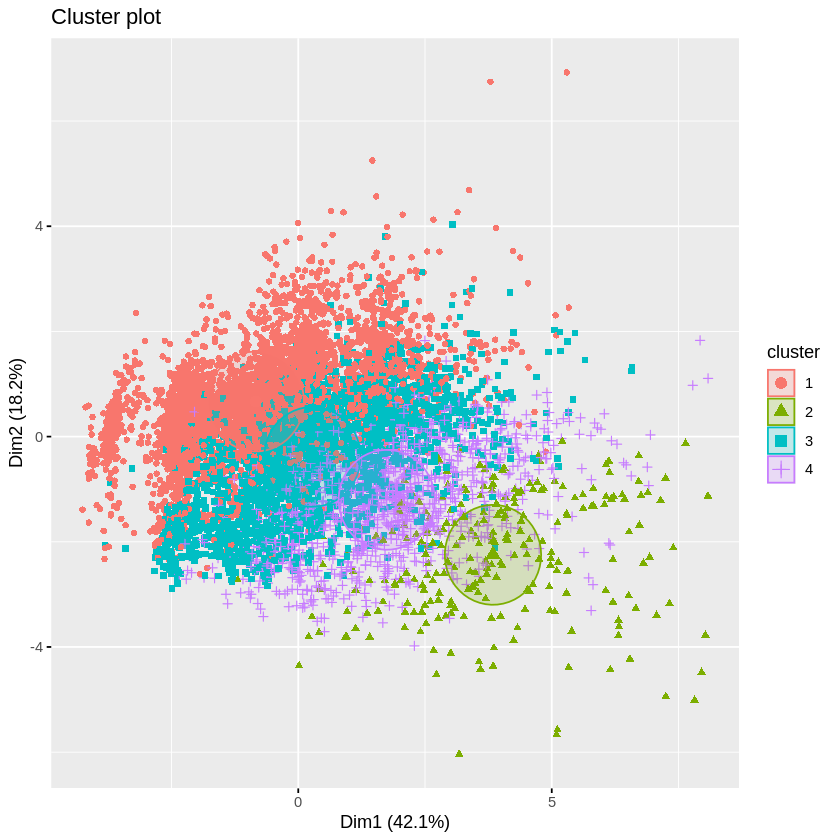

In [184]:
fviz_cluster(km, data = df3, geom = "point", ellipse.type = "euclid")

In [185]:
# Cluster means
km$centers

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,2.734623,646072.5,12.806846,2.721365,1.415997,1.545316,475.4514,118.3563,1978.216
2,4.271255,3488863.9,7.600405,4.198381,2.757085,2.307692,745.7571,288.7682,1950.421
3,3.266617,1209534.5,9.805601,3.238237,1.691561,1.667662,498.8439,159.0305,1955.246
4,3.777147,1985146.1,8.598136,3.742301,2.129660,1.901135,579.0292,213.4155,1945.254


In [186]:
final_data3 <- cbind(houses2, cluster = km$cluster)

In [187]:
final_data3$price_area <- final_data3$Price / final_data3$BuildingArea

In [188]:
head(final_data3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,cluster,price_area
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>
3,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,⋯,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019,3,13101.266
5,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,⋯,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019,3,9766.667
7,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,⋯,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019,4,11267.606
12,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,⋯,245,210,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019,4,8933.333
15,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,⋯,256,107,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019,4,15289.720
19,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,3067,⋯,220,75,1900,Yarra City Council,-37.8010,144.9989,Northern Metropolitan,4019,3,14626.667


In [189]:
names(final_data3)

[1] "Suburb"        "Address"       "Rooms"         "Type"         
 [5] "Price"         "Method"        "SellerG"       "Date"         
 [9] "Distance"      "Postcode"      "Bedroom2"      "Bathroom"     
[13] "Car"           "Landsize"      "BuildingArea"  "YearBuilt"    
[17] "CouncilArea"   "Lattitude"     "Longtitude"    "Regionname"   
[21] "Propertycount" "cluster"       "price_area"

In [190]:
fd3_sub <- select(final_data3, Rooms, Type, Price, Distance, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, cluster, price_area)

In [195]:
fd3_sub$Distance <- as.numeric(fd3_sub$Distance)

mean_summary <- fd3_sub %>%
  group_by(cluster) %>%
  summarize(mean_rooms = mean(Rooms),
            mean_price = mean(Price),
            mean_distance = mean(Distance),
            mean_bedroom = mean(Bedroom2),
            mean_bathroom = mean(Bathroom),
            mean_car = mean(Car),
            mean_landsize = mean(Landsize),
            mean_buildingarea = mean(BuildingArea),
            mean_yearbuilt = mean(YearBuilt),
            mean_price_area = mean(price_area))

kable(mean_summary)



| cluster| mean_rooms| mean_price| mean_distance| mean_bedroom| mean_bathroom| mean_car| mean_landsize| mean_buildingarea| mean_yearbuilt| mean_price_area|
|-------:|----------:|----------:|-------------:|------------:|-------------:|--------:|-------------:|-----------------:|--------------:|---------------:|
|       1|   2.734623|   646072.5|     12.806846|     2.721365|      1.415997| 1.545316|      475.4514|          118.3563|       1978.216|        8225.774|
|       2|   4.271255|  3488863.9|      7.600405|     4.198381|      2.757085| 2.307692|      745.7571|          288.7682|       1950.421|       28831.968|
|       3|   3.266617|  1209534.5|      9.805601|     3.238237|      1.691561| 1.667662|      498.8439|          159.0305|       1955.246|       10021.535|
|       4|   3.777147|  1985146.1|      8.598136|     3.742301|      2.129660| 1.901134|      579.0292|          213.4155|       1945.254|       11832.681|

In [196]:
# summarize clusters by property type
type_table <- table(final_data3$cluster, final_data3$Type)
type_table

   
       h    t    u
  1 2714  454 1433
  2  244    3    0
  3 2364  224   90
  4 1185   36   13

In [197]:
# convert table to proportions
round(prop.table(type_table),2)

   
       h    t    u
  1 0.31 0.05 0.16
  2 0.03 0.00 0.00
  3 0.27 0.03 0.01
  4 0.14 0.00 0.00

In [198]:
final_data3$Distance <- as.numeric(final_data3$Distance)
mean_distance <- aggregate(Distance ~ cluster, data = final_data3, FUN = mean)
mean_distance

cluster,Distance
<int>,<dbl>
1,12.806846
2,7.600405
3,9.805601
4,8.598136


In [199]:
mean_area <- aggregate(BuildingArea ~ cluster, data = final_data3, FUN = mean)
mean_area

cluster,BuildingArea
<int>,<dbl>
1,118.3563
2,288.7682
3,159.0305
4,213.4155


In [200]:
mean_ls <- aggregate(Landsize ~ cluster, data = final_data3, FUN = mean)
mean_ls

cluster,Landsize
<int>,<dbl>
1,475.4514
2,745.7571
3,498.8439
4,579.0292


In [201]:
mean_pa <- aggregate(price_area ~ cluster, data = final_data3, FUN = mean)
mean_pa

cluster,price_area
<int>,<dbl>
1,8225.774
2,28831.968
3,10021.535
4,11832.681


In [202]:
mean_yr <- aggregate(YearBuilt ~ cluster, data = final_data3, FUN = mean)
mean_yr

cluster,YearBuilt
<int>,<dbl>
1,1978.216
2,1950.421
3,1955.246
4,1945.254


In [203]:
table_region <- table(final_data3$cluster, final_data3$Regionname)
round(prop.table(table_region),2)

   
    Eastern Metropolitan Eastern Victoria Northern Metropolitan
  1                 0.04             0.01                  0.19
  2                 0.00             0.00                  0.00
  3                 0.05             0.00                  0.08
  4                 0.02             0.00                  0.02
   
    Northern Victoria South-Eastern Metropolitan Southern Metropolitan
  1              0.01                       0.03                  0.10
  2              0.00                       0.00                  0.03
  3              0.00                       0.01                  0.09
  4              0.00                       0.00                  0.09
   
    Western Metropolitan Western Victoria
  1                 0.15             0.00
  2                 0.00             0.00
  3                 0.06             0.00
  4                 0.01             0.00

In [204]:
describeBy(final_data3$price_area, final_data3$cluster, mat = TRUE) 

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,4601,8225.774,29440.17,6000.000,6041.886,2245.703,621.5203,815000,814378.5,17.73269,365.5009,434.0245
X12,2,2,1,247,28831.968,241806.17,12083.333,12474.876,3706.500,5790.5544,3812000,3806209.4,15.50462,239.5806,15385.7584
X13,3,3,1,2678,10021.535,31612.27,8303.758,8404.320,2800.592,1011.5274,1060000,1058988.5,26.80228,792.4851,610.8722
X14,4,4,1,1234,11832.681,28259.18,9819.805,10090.916,3194.047,1932.4853,822500,820567.5,24.32890,640.0982,804.4554


### T-SNE

In [205]:
install.packages("Rtsne")
install.packages("Ecdat")
install.packages("tsne")
library(Ecdat)
library(Rtsne)
library(tsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘DEoptimR’, ‘pcaPP’, ‘fds’, ‘deSolve’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘fda’, ‘tis’, ‘jpeg’, ‘TeachingDemos’, ‘BMA’, ‘Ecfun’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Ecfun


Attaching package: ‘Ecfun’


The following object is masked from ‘package:base’:

    sign



Attaching package: ‘Ecdat’


The following object is masked from ‘package:datasets’:

    Orange




In [206]:
require(Rtsne)

set.seed(1) # for reproducibility
tsne <- Rtsne(df3 , dims = 2, pca = TRUE, perplexity=30, verbose=TRUE, theta = .5,  max_iter = 5000, learning = 200, check_duplicates = FALSE)

Performing PCA
Read the 8760 x 9 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.99 seconds (sparsity = 0.011379)!
Learning embedding...
Iteration 50: error is 97.145849 (50 iterations in 2.68 seconds)
Iteration 100: error is 73.458027 (50 iterations in 2.20 seconds)
Iteration 150: error is 66.202780 (50 iterations in 2.07 seconds)
Iteration 200: error is 62.334774 (50 iterations in 2.12 seconds)
Iteration 250: error is 59.808363 (50 iterations in 2.16 seconds)
Iteration 300: error is 1.900624 (50 iterations in 2.64 seconds)
Iteration 350: error is 1.470525 (50 iterations in 2.24 seconds)
Iteration 400: error is 1.181681 (50 iterations in 2.17 seconds)
Iteration 450: error is 0.985681 (50 iterations in 2.24 seconds)
Iteration 500: error is 0.846080 (50 iterations in 2.28 seconds)
Iteration 550: error is 0.742264 (50 iterations in 2.76 seconds)
Iteration 600

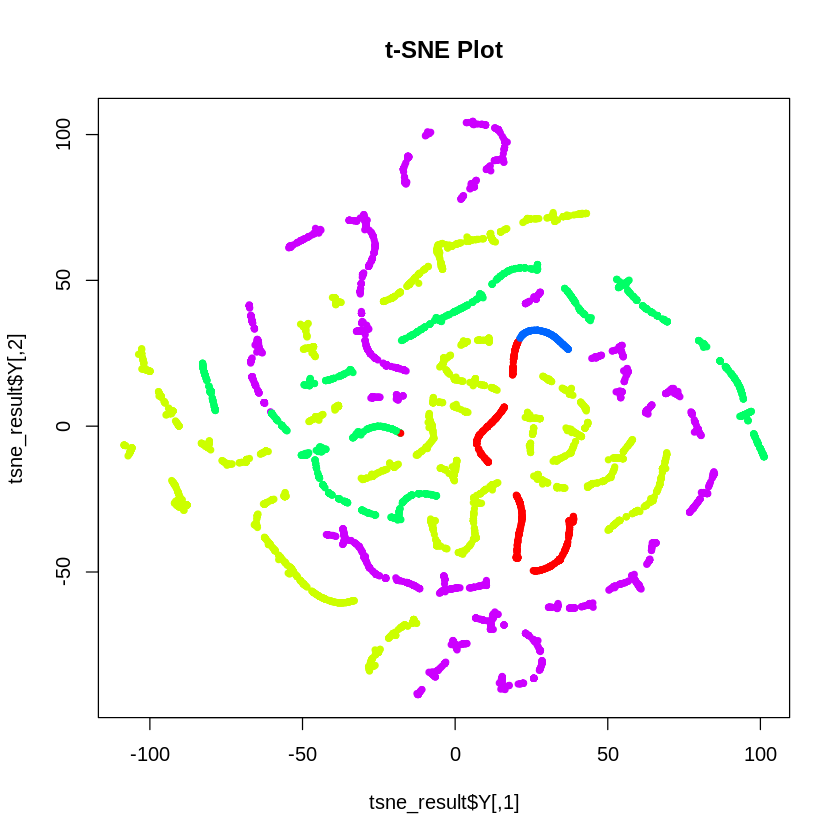

In [207]:
k <- 5 # Set the number of clusters
cluster_labels <- kmeans(df3[,1:2], k)$cluster

# Run t-SNE on the dataframe
tsne_result <- tsne

# Create a vector of colors for each cluster
cluster_colors <- rainbow(k)

# Create a plot of the t-SNE results with different colors for each cluster
plot(tsne_result$Y, col = cluster_colors[cluster_labels], pch = 20, main = "t-SNE Plot", check_duplicates = FALSE )